In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os 
import pandas as pd
import numpy as np
from collections import Counter

In [3]:
!ls '/content/drive/MyDrive/language_detection'

de_f  de_m  en_f  en_m	es_f  es_m


In [4]:
files=os.listdir('/content/drive/MyDrive/language_detection')
files=['/content/drive/MyDrive/language_detection/'+i for i in files]
files

['/content/drive/MyDrive/language_detection/de_f',
 '/content/drive/MyDrive/language_detection/de_m',
 '/content/drive/MyDrive/language_detection/en_f',
 '/content/drive/MyDrive/language_detection/en_m',
 '/content/drive/MyDrive/language_detection/es_f',
 '/content/drive/MyDrive/language_detection/es_m']

In [5]:
file2=[]
for i in files:
  fold=os.listdir(i)
  file2.append(i+"/"+fold[0])
print(file2)

['/content/drive/MyDrive/language_detection/de_f/de_f', '/content/drive/MyDrive/language_detection/de_m/de_m', '/content/drive/MyDrive/language_detection/en_f/en_f', '/content/drive/MyDrive/language_detection/en_m/en_m', '/content/drive/MyDrive/language_detection/es_f/es_f', '/content/drive/MyDrive/language_detection/es_m/es_m']


In [6]:
data_all=[]
for i in file2:
  data=os.listdir(i)
  for j in data:
    data_all.append(i+'/'+j)
data_all

['/content/drive/MyDrive/language_detection/de_f/de_f/de_f_f856a0201f94b3b57b61815ef8b715d2.fragment5.speed8.flac',
 '/content/drive/MyDrive/language_detection/de_f/de_f/de_f_f856a0201f94b3b57b61815ef8b715d2.fragment6.flac',
 '/content/drive/MyDrive/language_detection/de_f/de_f/de_f_f856a0201f94b3b57b61815ef8b715d2.fragment6.pitch2.flac',
 '/content/drive/MyDrive/language_detection/de_f/de_f/de_f_f856a0201f94b3b57b61815ef8b715d2.fragment6.noise8.flac',
 '/content/drive/MyDrive/language_detection/de_f/de_f/de_f_f856a0201f94b3b57b61815ef8b715d2.fragment6.pitch1.flac',
 '/content/drive/MyDrive/language_detection/de_f/de_f/de_f_f856a0201f94b3b57b61815ef8b715d2.fragment6.pitch4.flac',
 '/content/drive/MyDrive/language_detection/de_f/de_f/de_f_f856a0201f94b3b57b61815ef8b715d2.fragment5.noise8.flac',
 '/content/drive/MyDrive/language_detection/de_f/de_f/de_f_f856a0201f94b3b57b61815ef8b715d2.fragment6.noise11.flac',
 '/content/drive/MyDrive/language_detection/de_f/de_f/de_f_f856a0201f94b3b57b6

In [7]:
gender=[]
for gen in data_all:
    gender.append('male' if gen[55]=='m' else 'female')
Counter(gender)

Counter({'female': 12000, 'male': 12000})

In [8]:
language=[]
slang=[]
for lang in data_all:
    slang.append(lang[52:54])
    if(lang[52:54]=='es'):
        language.append("Spanish")
    elif(lang[52:54]=='en'):
        language.append("English")
    else:
        language.append("German")
Counter(language),Counter(slang)

(Counter({'English': 8000, 'German': 8000, 'Spanish': 8000}),
 Counter({'de': 8000, 'en': 8000, 'es': 8000}))

In [9]:
language[10],slang[10]

('German', 'de')

In [10]:
df=pd.DataFrame(data_all,columns=['Audio_files',])
df.head()

,Audio_files
0,/content/drive/MyDrive/language_detection/de_f...
1,/content/drive/MyDrive/language_detection/de_f...
2,/content/drive/MyDrive/language_detection/de_f...
3,/content/drive/MyDrive/language_detection/de_f...
4,/content/drive/MyDrive/language_detection/de_f...


In [11]:
df['Gender']=gender
df['Language']=language
df.head()

,Audio_files,Gender,Language
0,/content/drive/MyDrive/language_detection/de_f...,female,German
1,/content/drive/MyDrive/language_detection/de_f...,female,German
2,/content/drive/MyDrive/language_detection/de_f...,female,German
3,/content/drive/MyDrive/language_detection/de_f...,female,German
4,/content/drive/MyDrive/language_detection/de_f...,female,German


In [12]:
import wave
import librosa
import soundfile as sf

In [13]:
sample_data=df.Audio_files[10]
data,s_rate=librosa.load(sample_data)
data

array([-0.00790405, -0.01126099, -0.03790283, ..., -0.00750732,
       -0.00695801,  0.00134277], dtype=float32)

In [14]:
s_rate

22050

In [15]:
normalized_val=librosa.util.normalize(data)
normalized_val

array([-0.0222394 , -0.0316847 , -0.10664606, ..., -0.02112313,
       -0.01957754,  0.00377812], dtype=float32)

In [16]:
audio_shift=librosa.core.stft(normalized_val,n_fft=2048,hop_length=512)
audio_db=librosa.amplitude_to_db(abs(audio_shift))

In [17]:
audio_shift,audio_db

(array([[ 3.9562473e+00+0.0000000e+00j,  1.6290152e+00+0.0000000e+00j,
         -2.3194602e+00+0.0000000e+00j, ...,
          2.7039669e-02+0.0000000e+00j,  3.3793194e-04+0.0000000e+00j,
         -2.7951162e-02+0.0000000e+00j],
        [-2.8979406e+00+1.8496489e-16j, -1.2664459e+00-2.2524118e+00j,
          2.4368110e+00-1.7085942e+00j, ...,
          3.3082824e-02+1.0933986e-02j, -4.9662504e-02-3.8240306e-02j,
          4.7637124e-02+1.4371542e-02j],
        [ 1.3122538e+00+7.2807319e-17j,  2.4564420e-01+2.2651801e-01j,
         -1.2010581e+00+1.7279550e+00j, ...,
         -1.0222832e-01-2.5741015e-02j,  1.1367018e-01+4.5894995e-02j,
         -1.1497781e-01-8.7026089e-02j],
        ...,
        [-2.3244474e-02+1.0066503e-16j,  1.2286467e-02+3.4598584e-04j,
         -1.9092161e-03+4.0558307e-04j, ...,
          4.1919854e-04+9.1556285e-04j, -2.5682664e-03+3.7974320e-04j,
          1.4855237e-02-2.4474556e-02j],
        [ 2.3960268e-02+8.9121419e-17j,  4.2390326e-04-1.1294949e-02j,
    

In [18]:
import librosa.display
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

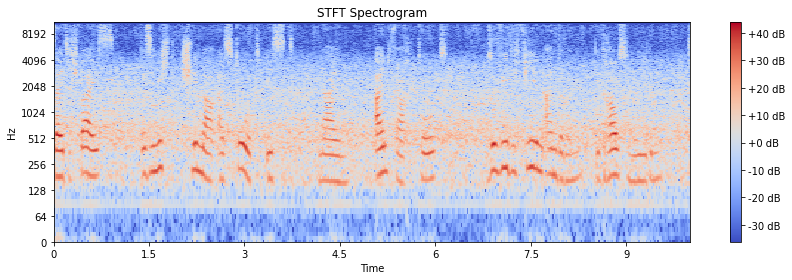

In [19]:
plt.figure(figsize=(12,4))
librosa.display.specshow(audio_db,x_axis='time',y_axis='log')
plt.colorbar(format='%+2.0f dB');
plt.title('STFT Spectrogram')
plt.tight_layout()
plt.show()

#MFCC coefficients


In [20]:
data_mfcc=librosa.feature.mfcc(normalized_val,s_rate,n_mfcc=40)
data_mfcc

array([[-1.08537651e+02, -9.82866135e+01, -1.06071709e+02, ...,
        -1.79201569e+02, -1.48690002e+02, -1.18808548e+02],
       [ 9.31289444e+01,  1.18638245e+02,  1.41615936e+02, ...,
         1.36382721e+02,  1.00815811e+02,  5.87558517e+01],
       [ 1.48716621e+01, -2.11776757e+00, -3.60706596e+01, ...,
        -5.44147949e+01, -3.56694527e+01, -1.55294514e+01],
       ...,
       [ 8.15872478e+00,  1.04169903e+01,  2.00469933e+01, ...,
         2.75310040e-01,  3.10691905e+00,  3.14645004e+00],
       [ 2.89485025e+00,  2.28181767e+00,  3.10448265e+00, ...,
         1.36400926e+00, -1.96360111e-01, -2.19946122e+00],
       [ 3.75731969e+00,  2.66141319e+00,  1.50663897e-01, ...,
         3.98322964e+00,  2.64271832e+00,  2.44394588e+00]], dtype=float32)

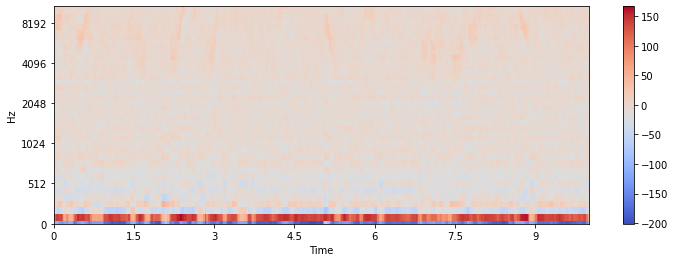

In [21]:
plt.figure(figsize=(12,4))
librosa.display.specshow(data_mfcc,x_axis='time',y_axis='mel')
plt.colorbar()
plt.show()

#Mel scaled spectrogram

In [22]:
mel_val=librosa.feature.melspectrogram(S=audio_shift,n_mels=128)
mel_db=librosa.amplitude_to_db(abs(mel_val))
normalized_mel_val=librosa.util.normalize(mel_db)

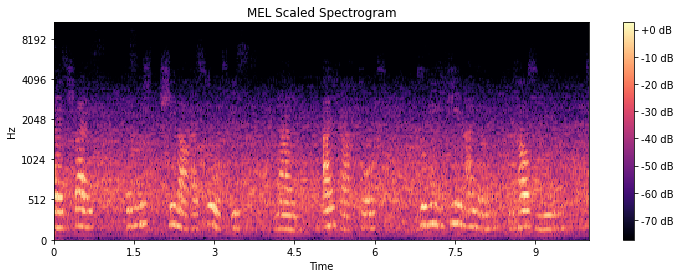

In [23]:
plt.figure(figsize=(12,4))
librosa.display.specshow(mel_db,x_axis='time',y_axis='mel')
plt.colorbar(format='%+2.0f dB');
plt.title('MEL Scaled Spectrogram')
plt.show()

In [24]:
mel=[]
for i in range(0,8000):
  data,s_rate=librosa.load(df.Audio_files[i])
  mel_val=librosa.feature.melspectrogram(data,s_rate,n_mels=128)
  mel_db_data=librosa.amplitude_to_db(abs(mel_val))
  normalized_mel_val=librosa.util.normalize(mel_db_data)
  size_reshape=cv2.resize(normalized_mel_val,(215,64))
  mel.append(size_reshape)

In [25]:
for i in range(8000,16000):
  data,s_rate=librosa.load(df.Audio_files[i])
  mel_val=librosa.feature.melspectrogram(data,s_rate,n_mels=128)
  mel_db_data=librosa.amplitude_to_db(abs(mel_val))
  normalized_mel_val=librosa.util.normalize(mel_db_data)
  size_reshape=cv2.resize(normalized_mel_val,(215,64))
  mel.append(size_reshape)

In [42]:
for i in range(16000,24000):
  data,s_rate=librosa.load(df.Audio_files[i])
  mel_val=librosa.feature.melspectrogram(data,s_rate,n_mels=128)
  mel_db_data=librosa.amplitude_to_db(abs(mel_val))
  normalized_mel_val=librosa.util.normalize(mel_db_data)
  size_reshape=cv2.resize(normalized_mel_val,(215,64))
  mel.append(size_reshape)

In [51]:
y=df.Language

In [52]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,precision_recall_fscore_support,confusion_matrix

In [53]:
from tensorflow.keras.utils import to_categorical

In [54]:
le=LabelEncoder()
y=to_categorical(le.fit_transform(y))

In [55]:
mel=np.array(mel)
y=np.array(y)

In [56]:
mel.shape

(15999, 64, 215)

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(mel,y,test_size=0.2,shuffle=True)

In [58]:
X_train.shape

(12799, 64, 215)

In [59]:
from keras.models import Sequential, load_model
from keras.layers import Dense,Dropout,Flatten,LeakyReLU,SpatialDropout2D,Activation,Conv2D,MaxPooling2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2

In [92]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(64,215,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(filters=48,kernel_size=(3,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(filters=64,kernel_size=(3,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.14))
model.add(Conv2D(filters=68,kernel_size=(3,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.14))
model.add(Flatten())
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(3,activation='sigmoid'))

In [93]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=Adam(lr=1e-4))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 62, 213, 32)       320       
                                                                 
 leaky_re_lu_26 (LeakyReLU)  (None, 62, 213, 32)       0         
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 31, 106, 32)      0         
 g2D)                                                            
                                                                 
 dropout_27 (Dropout)        (None, 31, 106, 32)       0         
                                                                 
 conv2d_37 (Conv2D)          (None, 29, 104, 48)       13872     
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 29, 104, 48)       0         
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [94]:
from keras.callbacks import ModelCheckpoint

In [95]:
filepath='my_best_model.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'
checkpoint=ModelCheckpoint(filepath=filepath,verbose=1,save_best_only=True)

In [96]:
model.fit(X_train,y_train,epochs=15,batch_size=64,validation_split=1/10,callbacks=[checkpoint],verbose=1)

Epoch 1/15
180/180 [==============================] - ETA: 0s - loss: 0.6383 - accuracy: 0.5922
Epoch 1: val_loss improved from inf to 0.61176, saving model to my_best_model.epoch01-loss0.61.hdf5
180/180 [==============================] - 7s 34ms/step - loss: 0.6383 - accuracy: 0.5922 - val_loss: 0.6118 - val_accuracy: 0.6445
Epoch 2/15
179/180 [============================>.] - ETA: 0s - loss: 0.5779 - accuracy: 0.6689
Epoch 2: val_loss improved from 0.61176 to 0.54103, saving model to my_best_model.epoch02-loss0.54.hdf5
180/180 [==============================] - 6s 32ms/step - loss: 0.5777 - accuracy: 0.6683 - val_loss: 0.5410 - val_accuracy: 0.7367
Epoch 3/15
179/180 [============================>.] - ETA: 0s - loss: 0.4895 - accuracy: 0.7542
Epoch 3: val_loss improved from 0.54103 to 0.46835, saving model to my_best_model.epoch03-loss0.47.hdf5
180/180 [==============================] - 5s 31ms/step - loss: 0.4895 - accuracy: 0.7543 - val_loss: 0.4683 - val_accuracy: 0.7523
Epoch 4/

In [97]:
model.evaluate(X_test,y_test)

100/100 [==============================] - 1s 9ms/step - loss: 0.1076 - accuracy: 0.9666


[0.10758808255195618, 0.9665625095367432]